# Pandas DataFrame for storing tweet feed (total 12 points)

Creating the following date frame for storing tweets:

- **climate_feed_df** DataFrame for storing tweets
- **retweeted_status_df** for storing original tweets

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp

The pickle files retweeted_status_df.pkl and climate_feed.pkl should be in the same folder as this notebook.
If needed, they can also be downloaded by uncommenting the commands below.

In [2]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [3]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pickle files in the same directory as the notebook

In [4]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [5]:
retweeted_status_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The National Party declares war on the Glouces...,True,"{'default_profile': False, 'protected': False,..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, '...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",This is the same idiot who thought\nThe southe...,False,"{'default_profile': False, 'protected': False,..."
3,NaN,None,Sat Feb 09 23:34:27 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,190.0,False,None,1.094379e+18,1094379028608438272,...,"{'favorited': False, 'favorite_count': 220, 'i...",1.093932e+18,1093931686998487040,31.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Communism is Fascism. Fighting Climate Change ...,True,"{'default_profile': False, 'protected': False,..."
4,NaN,None,Sat Feb 09 19:07:56 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,2905.0,False,None,1.094312e+18,1094311957669265408,...,NaN,NaN,NaN,599.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Unmitigated climate change would literally des...,True,"{'default_profile': True, 'protected': False, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,None,Sat Feb 09 20:56:39 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,1.0,False,None,1.094339e+18,1094339317324017665,...,NaN,NaN,NaN,1.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",72% of Americans are 'very worried' about clim...,False,"{'default_profile': True, 'protected': False, ..."
9995,NaN,None,Thu Feb 07 20:27:55 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,3491.0,False,None,1.093607e+18,1093607309606076416,...,NaN,NaN,NaN,482.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@JFaurall @MgBenchjeweler @SpeakerPelosi Calif...,True,"{'default_profile': True, 'protected': False, ..."
9996,NaN,None,Sat Feb 09 18:33:00 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,12586.0,False,None,1.094303e+18,1094303164805799936,...,NaN,NaN,NaN,2801.0,False,NaN,"<a href=""https://about.twitter.com/products/tw...",President Trump believes we should listen to f...,True,"{'default_profile': False, 'protected': False,..."
9997,NaN,None,Fri Feb 08 22:15:50 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,4249.0,False,None,1.093997e+18,1093996855111966720,...,"{'favorited': False, 'favorite_count': 551, 'i...",1.093893e+18,1093893115633647616,642.0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Wait til he hears how much climate change is g...,False,"{'default_profile': False, 'protected': False,..."


In [6]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.@SteveKingIA says he's unsure about the scien...,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @RobOakeshott1: The National Party declares...,False,996782298
2,None,None,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @emilia_suze: This is the same idiot who th...,False,45333453
3,None,None,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @PrettyBadLefty: Communism is Fascism. Figh...,False,1020067726532829185
4,None,None,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" ...",RT @kenklippenstein: Unmitigated climate chang...,False,19889325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339630500012033,1094339630500012033,...,NaN,NaN,NaN,1,False,1.094339e+18,"<a href=""http://twitter.com/download/android"" ...",RT @fromhello2hello: 72% of Americans are 'ver...,False,888112320097918976
9995,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339629107400704,1094339629107400704,...,NaN,NaN,NaN,482,False,1.093607e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @stuntdaddy_42: @JFaurall @MgBenchjeweler @...,False,3324836714
9996,None,None,Sat Feb 09 20:57:53 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339627316641794,1094339627316641794,...,NaN,NaN,NaN,2801,False,1.094303e+18,"<a href=""http://twitter.com/download/android"" ...",RT @SenSanders: President Trump believes we sh...,False,1487109794
9997,None,None,Sat Feb 09 20:57:51 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339619569557504,1094339619569557504,...,NaN,1093893115633647616,1093893115633647616,642,False,1.093997e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @KateAronoff: Wait til he hears how much cl...,False,4737089913


Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [7]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) Replace None with nan in climate_feed_df. Also display some random rows.


In [8]:
# write code here
climate_feed_df = climate_feed_df.fillna(value = np.nan)
for i in climate_feed_df:
    climate_feed_df[i] = np.where(climate_feed_df[i].isin([None, 'None']), np.nan, climate_feed_df[i])
climate_feed_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,NaN,NaN,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.@SteveKingIA says he's unsure about the scien...,True,3.147614e+07
1,NaN,NaN,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @RobOakeshott1: The National Party declares...,False,9.967823e+08
2,NaN,NaN,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @emilia_suze: This is the same idiot who th...,False,4.533345e+07
3,NaN,NaN,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @PrettyBadLefty: Communism is Fascism. Figh...,False,1.020068e+18
4,NaN,NaN,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" ...",RT @kenklippenstein: Unmitigated climate chang...,False,1.988932e+07


Working with only selected attributes.

In [9]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [10]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
8050,Sat Feb 09 21:35:06 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093683e+18,False,1.880423e+07,RT @philipaklein: The threat of climate change...
3554,Sat Feb 09 23:08:44 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094322e+18,False,2.570156e+07,RT @Morse4America: With the highest fire risk ...
5928,Sat Feb 09 22:18:01 +0000 2019,"{'hashtags': [{'indices': [46, 61], 'text': 'F...",1.093546e+18,False,2.180409e+07,RT @jyrkikatainen: My five priorities for the ...
173,Sun Feb 10 00:13:41 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,1.590176e+08,"@pmagn I never said it was *fine*, but I will ..."
5801,Sat Feb 09 22:20:34 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094261e+18,False,1.074999e+18,RT @Greenpeace: The answer to this question is...
9768,Sat Feb 09 21:02:11 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094256e+18,False,3.107597e+09,RT @FaithGoldy: PPC candidate banned from clim...
6923,Sat Feb 09 21:57:57 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,False,2.843549e+09,@ByronYork The day we spend 50% of GDP on clim...
2555,Sat Feb 09 23:28:55 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094099e+18,False,4.521331e+09,RT @TheEconomist: Oil and gas demand is rampin...
4346,Sat Feb 09 22:51:58 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094356e+18,False,8.045536e+17,RT @NPR: Whale poop is... bright orange? With ...
5925,Sat Feb 09 22:18:04 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,True,1.870031e+07,"Sir, the only climate change going on is the c..."


# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [11]:
# write code here
climate_feed_df['created_at'] = pd.to_datetime(climate_feed_df['created_at'])
climate_feed_df

,created_at,entities,retweeted_status,truncated,user_id,text
0,2019-02-10 00:17:31+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,3.147614e+07,.@SteveKingIA says he's unsure about the scien...
1,2019-02-10 00:17:30+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094332e+18,False,9.967823e+08,RT @RobOakeshott1: The National Party declares...
2,2019-02-10 00:17:26+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094385e+18,False,4.533345e+07,RT @emilia_suze: This is the same idiot who th...
3,2019-02-10 00:17:24+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094379e+18,False,1.020068e+18,RT @PrettyBadLefty: Communism is Fascism. Figh...
4,2019-02-10 00:17:23+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094312e+18,False,1.988932e+07,RT @kenklippenstein: Unmitigated climate chang...
...,...,...,...,...,...,...
9994,2019-02-09 20:57:54+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094339e+18,False,8.881123e+17,RT @fromhello2hello: 72% of Americans are 'ver...
9995,2019-02-09 20:57:54+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093607e+18,False,3.324837e+09,RT @stuntdaddy_42: @JFaurall @MgBenchjeweler @...
9996,2019-02-09 20:57:53+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,False,1.487110e+09,RT @SenSanders: President Trump believes we sh...
9997,2019-02-09 20:57:51+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093997e+18,False,4.737090e+09,RT @KateAronoff: Wait til he hears how much cl...


Checking datatype again

In [12]:
climate_feed_df.dtypes

created_at          datetime64[ns, UTC]
entities                         object
retweeted_status                float64
truncated                        object
user_id                         float64
text                             object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [13]:
climate_feed_df[climate_feed_df['created_at'].isna()]

,created_at,entities,retweeted_status,truncated,user_id,text


In [14]:
# write code here
for i in climate_feed_df:
    print('{}: {} NAN values'.format(i, len(climate_feed_df[climate_feed_df[i].isna()])))

created_at: 0 NAN values
entities: 0 NAN values
retweeted_status: 2690 NAN values
truncated: 0 NAN values
user_id: 0 NAN values
text: 0 NAN values


We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a column named hashtags. Values in this columns should be comma separated values of **text** attribute in **hashtags**  value.
 - Create a column named user_mentions. Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [15]:
# write code here
import ast
hashtag = []
user_mentions = []
ent = climate_feed_df[['entities']]
for i in range(len(ent)):
    new = ast.literal_eval(ent['entities'][i])
    if len(new['hashtags']) != 0:
        hashtag.append(new['hashtags'][0]['text'])
    else:
        hashtag.append(None)
    if len(new['user_mentions']) != 0:
        user_mentions.append(new['user_mentions'][0]['name'])
    else:
        user_mentions.append(None)
        
climate_feed_df['hashtags'] = hashtag
climate_feed_df['user_mentions'] = user_mentions
climate_feed_df.head()

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions
0,2019-02-10 00:17:31+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,3.147614e+07,.@SteveKingIA says he's unsure about the scien...,None,Steve King
1,2019-02-10 00:17:30+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094332e+18,False,9.967823e+08,RT @RobOakeshott1: The National Party declares...,None,Rob Oakeshott
2,2019-02-10 00:17:26+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094385e+18,False,4.533345e+07,RT @emilia_suze: This is the same idiot who th...,None,Suze Michelini
3,2019-02-10 00:17:24+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094379e+18,False,1.020068e+18,RT @PrettyBadLefty: Communism is Fascism. Figh...,None,Chad Vigorous
4,2019-02-10 00:17:23+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094312e+18,False,1.988932e+07,RT @kenklippenstein: Unmitigated climate chang...,None,Ken Klippenstein


# Cleaning tweets

Let's see some random tweets

In [16]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

1143    RT @KayKosmos: People are dying from poverty, no healthcare, gun violence &amp; climate change.\nYet, Admin wants a wall for their racist agenda…
7021       RT @paulcaradonna: Climate change, phenological shifts, reproductive failure, and population dynamics...\n\nThis paper has been a loooooong t…
7345           This is a bipartisan solution to global climate change. Good for the nation. Good for the health of our children.… https://t.co/lLdXfu5C8Q
1682          RT @TDPattillo: @realDonaldTrump Donald Trump does not understand the cause or impact of global climate change. To him it’s all just a big…
7364      RT @Education4Libs: Nancy Pelosi excluded Alexandria Ocasio-Cortez from the new Climate Change Committee.\n\nLmao....\n\nThat moment you're so…
                                                                              ...                                                                        
4622         RT @APCentralRegion: A Republican-imposed rule that banned the 

**Example of tweet not truncated**

In [17]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [18]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [19]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [20]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(3.5 points, 1 for the use of requests and text extraction from right html element+.5+1+1 for the rest.) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

Option 1. This question frequently presents a challenge to students. If needed, please use the provided pickle file.
Just uncomment the following cell to import the dataframe.

Option 2. Use twitter API. For this you will need to look at hw 4 to set up the connection and use the "2/tweets/{id}" endpoint.

Either option will work. You will still need to do the cleaning portion of the question for either option you choose.

This is also the documentation link for the api call:
https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [21]:
import pickle
with open('q5_dataframe.pkl', 'rb') as f:
    climate_feed_df = pickle.loads(f.read())
climate_feed_df.head()

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408


# Q 6(point 1= .5+.5) Remove all the references  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [22]:
climate_feed_df

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408
...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/72-americans-are-very-worried-about-climate-change.html'}], 'symbols': []}",1.094339e+18,True,888112320097918976,RT @fromhello2hello: 72% of Americans are 'very worried' about climate change https://t.co/P1X5jfuUQC,None,fromhello2hello,72% of Americans are 'very worried' about climate change https://t.co/P1X5jfuUQC,1094339317324017665
9995,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1082006962995429383', 'name': 'stuntdaddy_42', 'screen_name'

In [23]:
# write code here
climate_feed_df = climate_feed_df[climate_feed_df['retweeted_status'].isnull()].reset_index().drop(['index'], axis = 1)

for i in range(len(climate_feed_df)):
    if 'https' in climate_feed_df['text'][i]:
        climate_feed_df = climate_feed_df.drop([i], axis = 0)
    elif 'http' in climate_feed_df['text'][i]:
        climate_feed_df = climate_feed_df.drop([i], axis = 0)
    elif '\nhttp' in climate_feed_df['text'][i]:
        climate_feed_df = climate_feed_df.drop([i], axis = 0)

In [24]:
climate_feed_df

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
2,2019-02-10 00:17:18,"{'hashtags': [], 'user_mentions': [], 'urls': [], 'symbols': []}",NaN,True,64454244,"Coming up next on CCTV's government channel (Comcast22/Verizon42)\n2/9/2019 9:00:00 PM: MVP on Climate Change Jan. 28, 2019",None,None,None,None
4,2019-02-10 00:17:17,"{'hashtags': [], 'user_mentions': [{'id_str': '233590439', 'name': 'Butch Pinkham', 'screen_name': 'BPinkham', 'indices': [0, 9], 'id': 233590439}, {'id_str': '16067160', 'name': 'Bill Clearlake', 'screen_name': 'BClearlake', 'indices': [10, 21], 'id': 16067160}, {'id_str': '19255889', 'name': 'Happy New Prank', 'screen_name': 'Prankster36', 'indices': [22, 34], 'id': 19255889}, {'id_str': '817113', 'name': 'jay smooth', 'screen_name': 'jsmooth995', 'indices': [35, 46], 'id': 817113}, {'id_str': '138203134', 'name': 'Alexandria Ocasio-Cortez', 'scree...",NaN,True,1338249150,"@BPinkham @BClearlake @Prankster36 @jsmooth995 @AOC You could have led with ""I'm a climate change denier"" and saved yourself some time.",None,"Butch Pinkham,Bill Clearlake,Happy New Prank,jay smooth,Alexandria Ocasio-Cortez",None,None
10,2019-02-10 00:16:49,"{'hashtags': [], 'user_mentions': [{'id_str': '20562637', 'name': 'Business Insider', 'screen_name': 'businessinsider', 'indices': [0, 16], 'id': 20562637}], 'urls': [], 'symbols': []}",NaN,True,3825559162,@businessinsider Your projections don’t take into account climate change.,None,Business Insider,None,None
24,2019-02-10 00:15:15,"{'hashtags': [], 'user_mentions': [{'id_str': '309907190', 'name': 'Alex Hayden DiLalla 🔥', 'screen_name': 'AlexDiLalla', 'indices': [0, 12], 'id': 309907190}], 'urls': [], 'symbols': []}",NaN,True,981802260,"@AlexDiLalla Yo just wait until climate change, can’t wait to see your launch on the North Pole in 2050",None,Alex Hayden DiLalla 🔥,None,None
28,2019-02-10 00:14:54,"{'hashtags': [], 'user_mentions': [{'id_str': '28162211', 'name': 'Max Boot', 'screen_name': 'MaxBoot', 'indices': [0, 8], 'id': 28162211}], 'urls': [], 'symbols': []}",NaN,True,833361488051990529,"@MaxBoot Meanwhile, climate change is the real threat to their children and grand-children's future,",None,Max Boot,None,None
...,...,...,...,...,...,...,...,...,...,...
2666,2019-02-09 20:59:51,"{'hashtags': [], 'user_mentions': [{'id_str': '480928317', 'name': 'Ghost of TedBullpitt', 'screen_name': 'TedBullpitt1', 'indices': [0, 13], 'id': 480928317}], 'urls': [], 'symbols': []}",NaN,True,770132773965328385,@TedBullpitt1 So a car is a car! A plane a plane. Climate change forecasting equipment climate change forecasting equipment,None,Ghost of TedBullpitt,None,None
2675,2019-02-09 20:59:15,"{'hashtags': [], 'user_mentions': [{'id_str': '27533455', 'name': ""Sarah 'Salty' Switzer🔥"", 'screen_name': 'Riginal_Zin', 'indices': [56, 68], 'id': 27533455}], 'urls': [], 'symbols': []}",NaN,True,2799203098,That young little lady on climate change gives me hope! @Riginal_Zin,None,Sarah 'Salty' Switzer🔥,None,None
2680,2019-02-09 20:59:01,"{'hashtags': [], 'user_mentions': [{'id_str': '33537967', 'name': 'Amy Klobuchar', 'screen_name': 'amyklobuchar', 'indices': [0, 13], 'id': 33537967}], 'urls': [], 'symbols': []}",NaN,True,849356949854486528,@amyklobuchar Climate change is nature's way of cleaning up. GOD is in charge of the climate!,None,Amy Klobuchar,None,None
2685,2019-02-09 20:58:33,"{'hashtags': [], 'user_mentions': [{'id_str': '33537967', 'name': 'Amy Klobuchar', 'screen_name': 'amyklobuchar', 'indices': [0, 13], 'id': 33537967}], 'urls': [], 'symbols': []}",NaN,True,3094647726,@amyklobuchar Bundle up! Cause man made climate change is fucking scam!!,None,Amy Klobuchar,None,None


# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words don't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [25]:
# write code here
with open('q5_dataframe.pkl', 'rb') as f:
    climate_feed_df = pickle.loads(f.read())
climate_feed_df.head()
climate_feed_df['final_tweet_text'] = np.where(climate_feed_df['original_tweet_text'].isna(), climate_feed_df['text'], climate_feed_df['original_tweet_text'])
climate_feed_df

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,final_tweet_text
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV"
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd"
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY
...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello

# Emoji detection

See this example of emoji as unicode characters

In [26]:
climate_feed_df['final_tweet_text'].loc[3931]

'@DoctorKarl Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [27]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [28]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [29]:
! pip install emoji

In [30]:
import emoji

In [32]:
# emoji.UNICODE_EMOJI

# Q 8(1 point) Create a column  called *emoji*.  This column should contain a list of tuples for emoji detected in *final_tweet_text*. The first element of the tuple is the emoji detected and second is the text describing the emoji.

In [33]:
# write code here
l = []


for i in range(len(climate_feed_df)):
    if len(emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[i]))==0:
        l.append(None)
    else:
        l.append(emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[i]))
climate_feed_df['emoji']=l
climate_feed_df[~climate_feed_df['emoji'].isna()]

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,final_tweet_text,emoji
3931,2019-02-09 23:00:36,"{'hashtags': [], 'user_mentions': [{'id_str': '21147300', 'name': 'Dr Karl', 'screen_name': 'DoctorKarl', 'indices': [0, 11], 'id': 21147300}], 'urls': [], 'symbols': []}",NaN,True,2882986945,"@DoctorKarl Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.",None,Dr Karl,None,None,"@DoctorKarl Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.","[😱, 😱, 😱]"
7429,2019-02-09 21:47:41,"{'hashtags': [], 'user_mentions': [{'id_str': '3459051', 'name': 'Greenpeace', 'screen_name': 'Greenpeace', 'indices': [3, 14], 'id': 3459051}], 'urls': [], 'symbols': []}",1.094121e+18,True,483405140,"RT @Greenpeace: The livestock industry contributes as much to climate change as all cars, trains, planes and ships combined😱 &gt;&gt; https://t.c…",None,Greenpeace,"The livestock industry contributes as much to climate change as all cars, trains, planes and ships combined😱 &gt;&gt;… https://t.co/961OCJn1qz",1094121246579662848,"The livestock industry contributes as much to climate change as all cars, trains, planes and ships combined😱 &gt;&gt;… https://t.co/961OCJn1qz",[😱]


# We will use wordcloud  to do elemetary exploratory data analysis (EDA). We will do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [34]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline

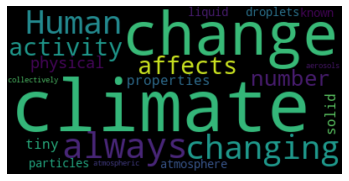

In [37]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [38]:
# write code here
# I have include a sample ooutput. Your output can be different

# Homework ends
# Final thoughts
We did not do all of the cleanup or used all attributes for EDA. Let us highlight one more cleanup activity related to language.

In [ ]:
!pip install enchant
import enchant

In [ ]:
dictionary = enchant.Dict('en')

In [ ]:
climate_feed_df['text'].loc[5217]

In [ ]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]